In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
M = np.load('M.npy')

In [3]:
NdotEFV    = pd.read_pickle('RawEFV.pkl')
NdotNG     = pd.read_pickle('RawNG.pkl')
NdotDeM    = pd.read_pickle('RawDeM.pkl')
NdotLeak   = pd.read_pickle('RawLeak.pkl')
NdotMRV    = pd.read_pickle('RawMRV.pkl')
NdotLMR    = pd.read_pickle('RawLMR.pkl')
NdotBleedL = pd.read_pickle('RawBleedL.pkl')
NdotHMR    = pd.read_pickle('RawHMR.pkl')
NdotBleedH = pd.read_pickle('RawBleedH.pkl')
NdotVap    = pd.read_pickle('RawVap.pkl')
NdotLiq    = pd.read_pickle('RawLiq.pkl')

In [4]:
index = NdotEFV.index
columns = ['mdot']
mdotEFV    = pd.DataFrame(NdotEFV @ M,index=index, columns=columns)
mdotNG     = pd.DataFrame(NdotNG @ M,index=index, columns=columns)
mdotDeM    = pd.DataFrame(NdotDeM @ M,index=index, columns=columns)
mdotLeak   = pd.DataFrame(NdotLeak @ M,index=index, columns=columns)
mdotMRV    = pd.DataFrame(NdotMRV @ M,index=index, columns=columns)
mdotLMR    = pd.DataFrame(NdotLMR @ M,index=index, columns=columns)
mdotBleedL = pd.DataFrame(NdotBleedL @ M,index=index, columns=columns)
mdotHMR    = pd.DataFrame(NdotHMR @ M,index=index, columns=columns)
mdotBleedH = pd.DataFrame(NdotBleedH @ M,index=index, columns=columns)
mdotVap    = pd.DataFrame(NdotVap @ M,index=index, columns=columns)
mdotLiq    = pd.DataFrame(NdotLiq @ M,index=index, columns=columns)

### Eq1: DeM + NG = EFV

In [5]:
LHS1m = (mdotDeM + mdotNG)/1000
RHS1m = (mdotEFV)/1000

In [6]:
(LHS1m-RHS1m).describe()

,mdot
count,19858.000000
mean,0.322412
std,0.879949
min,-10.221093
25%,0.378835
50%,0.407036
75%,0.434242
max,0.490495


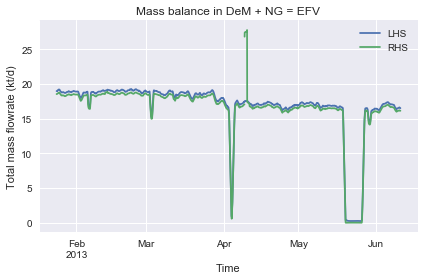

In [7]:
ax = LHS1m['mdot'].plot()
RHS1m['mdot'].plot(ax=ax)
plt.ylabel('Total mass flowrate (kt/d)')
plt.title('Mass balance in DeM + NG = EFV')
plt.legend(['LHS','RHS'])
plt.tight_layout()
plt.savefig('Eq1_mdot.png', dpi = 300)
plt.show()

In [8]:
LHS1 = NdotDeM + NdotNG
RHS1 = NdotEFV

In [9]:
(LHS1-RHS1).describe()

,C1,C2,C3,C4,N2
count,19858.000000,19858.000000,19858.000000,19858.000000,19858.000000
mean,17.103324,0.731065,0.340328,0.157941,0.066527
std,46.514363,2.016912,0.952701,0.466386,0.227661
min,-542.570001,-45.979591,-23.713175,-19.623806,-17.281040
25%,20.060401,0.859621,0.404747,0.187377,0.077431
50%,21.552788,0.929139,0.435232,0.204574,0.084412
75%,23.008481,0.999609,0.463698,0.218043,0.090482
max,25.995956,1.834445,0.893304,0.633880,1.314833


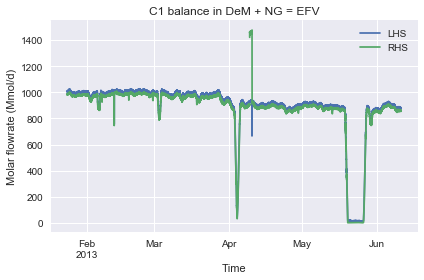

In [10]:
ax = LHS1['C1'].plot()
RHS1['C1'].plot(ax=ax)
plt.ylabel('Molar flowrate (Mmol/d)')
plt.title('C1 balance in DeM + NG = EFV')
plt.legend(['LHS','RHS'])
plt.tight_layout()
plt.savefig('Eq1_C1.png', dpi = 300)
plt.show()

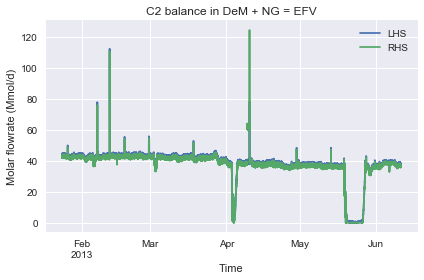

In [11]:
ax = LHS1['C2'].plot()
RHS1['C2'].plot(ax=ax)
plt.ylabel('Molar flowrate (Mmol/d)')
plt.title('C2 balance in DeM + NG = EFV')
plt.legend(['LHS','RHS'])
plt.tight_layout()
plt.savefig('Eq1_C2.png', dpi = 300)
plt.show()

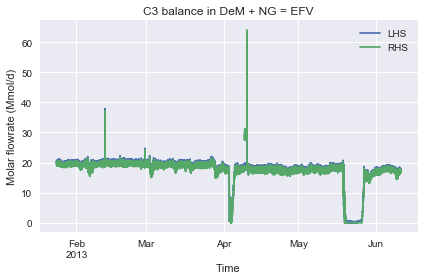

In [12]:
ax = LHS1['C3'].plot()
RHS1['C3'].plot(ax=ax)
plt.ylabel('Molar flowrate (Mmol/d)')
plt.title('C3 balance in DeM + NG = EFV')
plt.legend(['LHS','RHS'])
plt.tight_layout()
plt.savefig('Eq1_C3.png', dpi = 300)
plt.show()

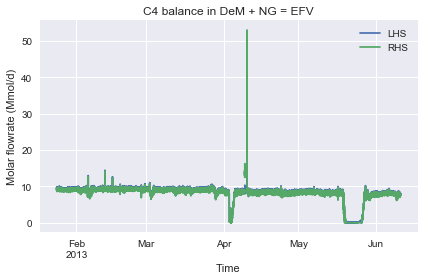

In [13]:
ax = LHS1['C4'].plot()
RHS1['C4'].plot(ax=ax)
plt.ylabel('Molar flowrate (Mmol/d)')
plt.title('C4 balance in DeM + NG = EFV')
plt.legend(['LHS','RHS'])
plt.tight_layout()
plt.savefig('Eq1_C4.png', dpi = 300)
plt.show()

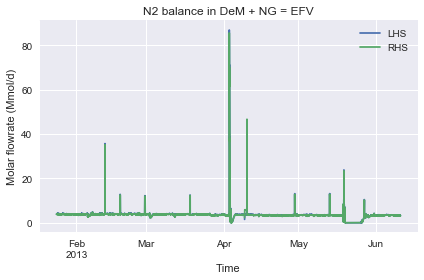

In [14]:
ax = LHS1['N2'].plot()
RHS1['N2'].plot(ax=ax)
plt.ylabel('Molar flowrate (Mmol/d)')
plt.title('N2 balance in DeM + NG = EFV')
plt.legend(['LHS','RHS'])
plt.tight_layout()
plt.savefig('Eq1_N2.png', dpi = 300)
plt.show()

### Eq2: Leak + LMR + HMR + Vap = MRV

In [15]:
LHS2m = (mdotLeak + mdotLMR + mdotHMR + mdotVap)/1000
RHS2m = (mdotMRV)/1000

In [16]:
(LHS2m-RHS2m).describe()

,mdot
count,19858.000000
mean,0.103729
std,1.351057
min,-11.885041
25%,0.225237
50%,0.339024
75%,0.437812
max,0.872526


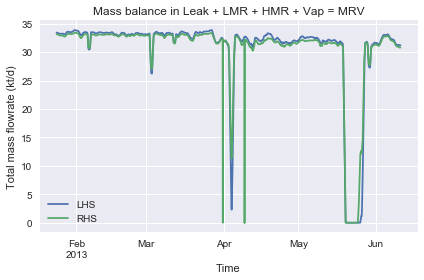

In [17]:
ax = LHS2m['mdot'].plot()
RHS2m['mdot'].plot(ax=ax)
plt.ylabel('Total mass flowrate (kt/d)')
plt.title('Mass balance in Leak + LMR + HMR + Vap = MRV')
plt.legend(['LHS','RHS'])
plt.tight_layout()
plt.savefig('Eq2_mdot.png', dpi = 300)
plt.show()

In [18]:
LHS2 = NdotLeak + NdotLMR + NdotHMR + NdotVap
RHS2 = NdotMRV

In [19]:
(LHS2-RHS2).describe()

,C1,C2,C3,C4,N2
count,19858.000000,19858.000000,19858.000000,19858.000000,19858.000000
mean,-98.546137,8.546423,8.348640,0.903023,35.948676
std,68.991933,23.736723,7.302356,2.495314,18.318197
min,-796.292182,-193.579837,-54.097038,-10.289055,-144.963065
25%,-107.993524,4.207610,5.084005,0.279793,26.642250
50%,-87.109525,11.156360,8.335740,0.440135,34.865417
75%,-74.431376,16.214803,11.424188,1.103775,50.247875
max,4.560491,238.232420,81.894304,29.953178,131.949918


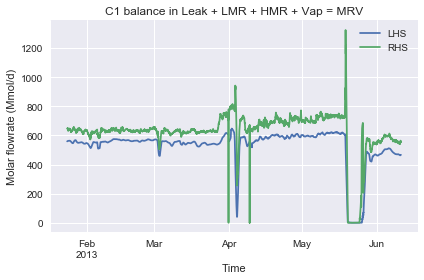

In [20]:
ax = LHS2['C1'].plot()
RHS2['C1'].plot(ax=ax)
plt.ylabel('Molar flowrate (Mmol/d)')
plt.title('C1 balance in Leak + LMR + HMR + Vap = MRV')
plt.legend(['LHS','RHS'])
plt.tight_layout()
plt.savefig('Eq2_C1.png', dpi = 300)
plt.show()

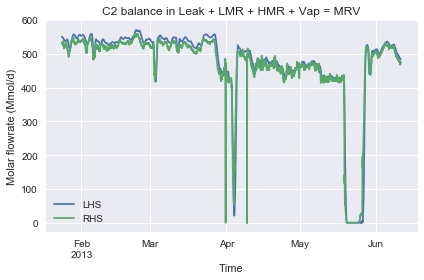

In [21]:
ax = LHS2['C2'].plot()
RHS2['C2'].plot(ax=ax)
plt.ylabel('Molar flowrate (Mmol/d)')
plt.title('C2 balance in Leak + LMR + HMR + Vap = MRV')
plt.legend(['LHS','RHS'])
plt.tight_layout()
plt.savefig('Eq2_C2.png', dpi = 300)
plt.show()

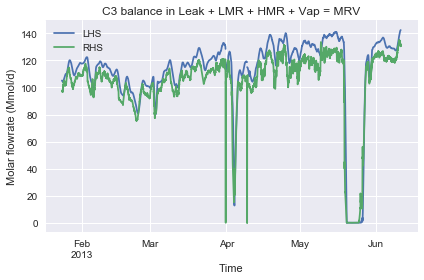

In [22]:
ax = LHS2['C3'].plot()
RHS2['C3'].plot(ax=ax)
plt.ylabel('Molar flowrate (Mmol/d)')
plt.title('C3 balance in Leak + LMR + HMR + Vap = MRV')
plt.legend(['LHS','RHS'])
plt.tight_layout()
plt.savefig('Eq2_C3.png', dpi = 300)
plt.show()

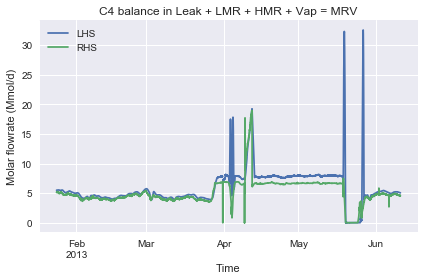

In [23]:
ax = LHS2['C4'].plot()
RHS2['C4'].plot(ax=ax)
plt.ylabel('Molar flowrate (Mmol/d)')
plt.title('C4 balance in Leak + LMR + HMR + Vap = MRV')
plt.legend(['LHS','RHS'])
plt.tight_layout()
plt.savefig('Eq2_C4.png', dpi = 300)
plt.show()

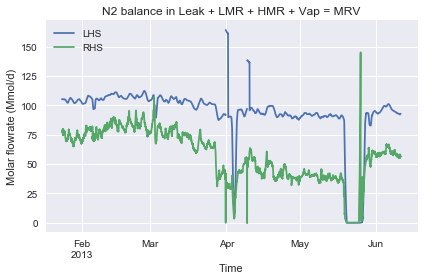

In [24]:
ax = LHS2['N2'].plot()
RHS2['N2'].plot(ax=ax)
plt.ylabel('Molar flowrate (Mmol/d)')
plt.title('N2 balance in Leak + LMR + HMR + Vap = MRV')
plt.legend(['LHS','RHS'])
plt.tight_layout()
plt.savefig('Eq2_N2.png', dpi = 300)
plt.show()

### Eq3: MRV + Liq = LMR + BleedL + HMR + BleedH

In [25]:
LHS3m = (mdotMRV + mdotLiq)/1000
RHS3m = (mdotLMR + mdotBleedL + mdotHMR + mdotBleedH)/1000

In [26]:
(LHS3m-RHS3m).describe()

,mdot
count,19871.000000
mean,-0.126020
std,1.582796
min,-32.679467
25%,-0.439353
50%,-0.340380
75%,-0.225957
max,11.885041


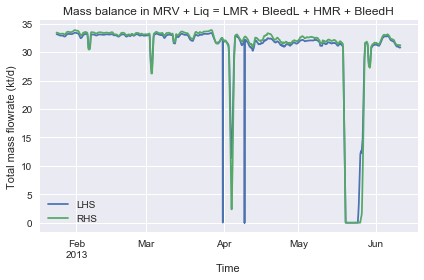

In [27]:
ax = LHS3m['mdot'].plot()
RHS3m['mdot'].plot(ax=ax)
plt.ylabel('Total mass flowrate (kt/d)')
plt.title('Mass balance in MRV + Liq = LMR + BleedL + HMR + BleedH')
plt.legend(['LHS','RHS'])
plt.tight_layout()
plt.savefig('Eq3_mdot.png', dpi = 300)
plt.show()

In [28]:
LHS3 = NdotMRV + NdotLiq
RHS3 = NdotLMR + NdotBleedL + NdotHMR + NdotBleedH

In [29]:
(LHS3-RHS3).describe()

,C1,C2,C3,C4,N2
count,19871.000000,19871.000000,19871.000000,19871.000000,19871.000000
mean,101.708510,-9.827438,-8.187838,-0.782240,-37.684089
std,72.757372,26.630292,7.781733,2.483255,19.984107
min,-593.478873,-506.764778,-127.068846,-29.795708,-168.304229
25%,74.213824,-16.828689,-11.011843,-0.777827,-54.288035
50%,88.212876,-12.162617,-8.223456,-0.441116,-34.922975
75%,118.269249,-5.870453,-4.950230,-0.278618,-26.636218
max,808.627763,192.592784,53.755190,10.459043,144.963065


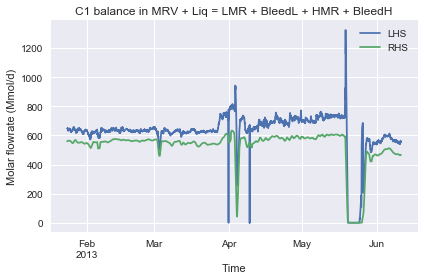

In [30]:
ax = LHS3['C1'].plot()
RHS3['C1'].plot(ax=ax)
plt.ylabel('Molar flowrate (Mmol/d)')
plt.title('C1 balance in MRV + Liq = LMR + BleedL + HMR + BleedH')
plt.legend(['LHS','RHS'])
plt.tight_layout()
plt.savefig('Eq3_C1.png', dpi = 300)
plt.show()

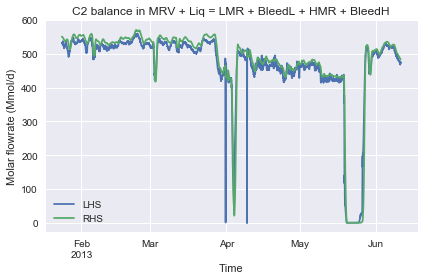

In [31]:
ax = LHS3['C2'].plot()
RHS3['C2'].plot(ax=ax)
plt.ylabel('Molar flowrate (Mmol/d)')
plt.title('C2 balance in MRV + Liq = LMR + BleedL + HMR + BleedH')
plt.legend(['LHS','RHS'])
plt.tight_layout()
plt.savefig('Eq3_C2.png', dpi = 300)
plt.show()

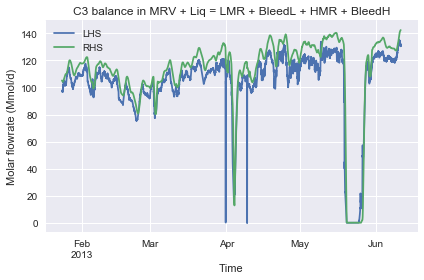

In [32]:
ax = LHS3['C3'].plot()
RHS3['C3'].plot(ax=ax)
plt.ylabel('Molar flowrate (Mmol/d)')
plt.title('C3 balance in MRV + Liq = LMR + BleedL + HMR + BleedH')
plt.legend(['LHS','RHS'])
plt.tight_layout()
plt.savefig('Eq3_C3.png', dpi = 300)
plt.show()

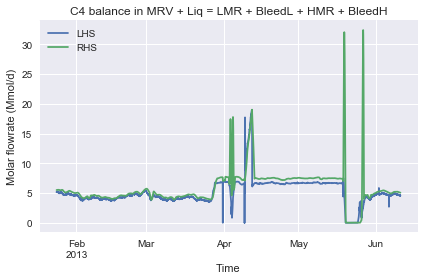

In [33]:
ax = LHS3['C4'].plot()
RHS3['C4'].plot(ax=ax)
plt.ylabel('Molar flowrate (Mmol/d)')
plt.title('C4 balance in MRV + Liq = LMR + BleedL + HMR + BleedH')
plt.legend(['LHS','RHS'])
plt.tight_layout()
plt.savefig('Eq3_C4.png', dpi = 300)
plt.show()

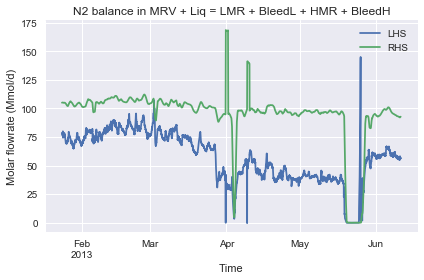

In [34]:
ax = LHS3['N2'].plot()
RHS3['N2'].plot(ax=ax)
plt.ylabel('Molar flowrate (Mmol/d)')
plt.title('N2 balance in MRV + Liq = LMR + BleedL + HMR + BleedH')
plt.legend(['LHS','RHS'])
plt.tight_layout()
plt.savefig('Eq3_N2.png', dpi = 300)
plt.show()